In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [2]:
cc_df = pd.read_csv('creditcard.csv')

In [3]:
# shape of data
print(cc_df.shape)

# # info of data
# print(cc_df.info())

# # number of all missing value in data
# print(cc_df.isna().sum().sum())

# # check data types
# print(cc_df.dtypes)

(284807, 31)


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

def plot_distributions(data, color='blue'):
    """
    This function takes a pandas DataFrame as input and plots the distribution of each feature
    in a single figure. The number of rows and columns in the figure is determined dynamically
    based on the number of features in the DataFrame. The "darkgrid" theme from seaborn is applied
    to the plots. You can specify a color for the bars in the histogram by passing a "color" parameter.
    """
    sns.set_theme(style='whitegrid')  # set the seaborn theme

    num_cols = 3  # set the number of columns per row
    num_features = len(data.columns)
    num_rows = math.ceil(num_features / num_cols)

    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5*num_rows))

    for i, column in enumerate(data.columns):
        row = i // num_cols
        col = i % num_cols
        axs[row][col].hist(data[column], bins=30, alpha=0.5, color=color)
        axs[row][col].set_title(f'Distribution of {column}')
        axs[row][col].set_xlabel(column)
        axs[row][col].set_ylabel('Frequency')
    
    fig.tight_layout(pad=2.0)
    plt.show()


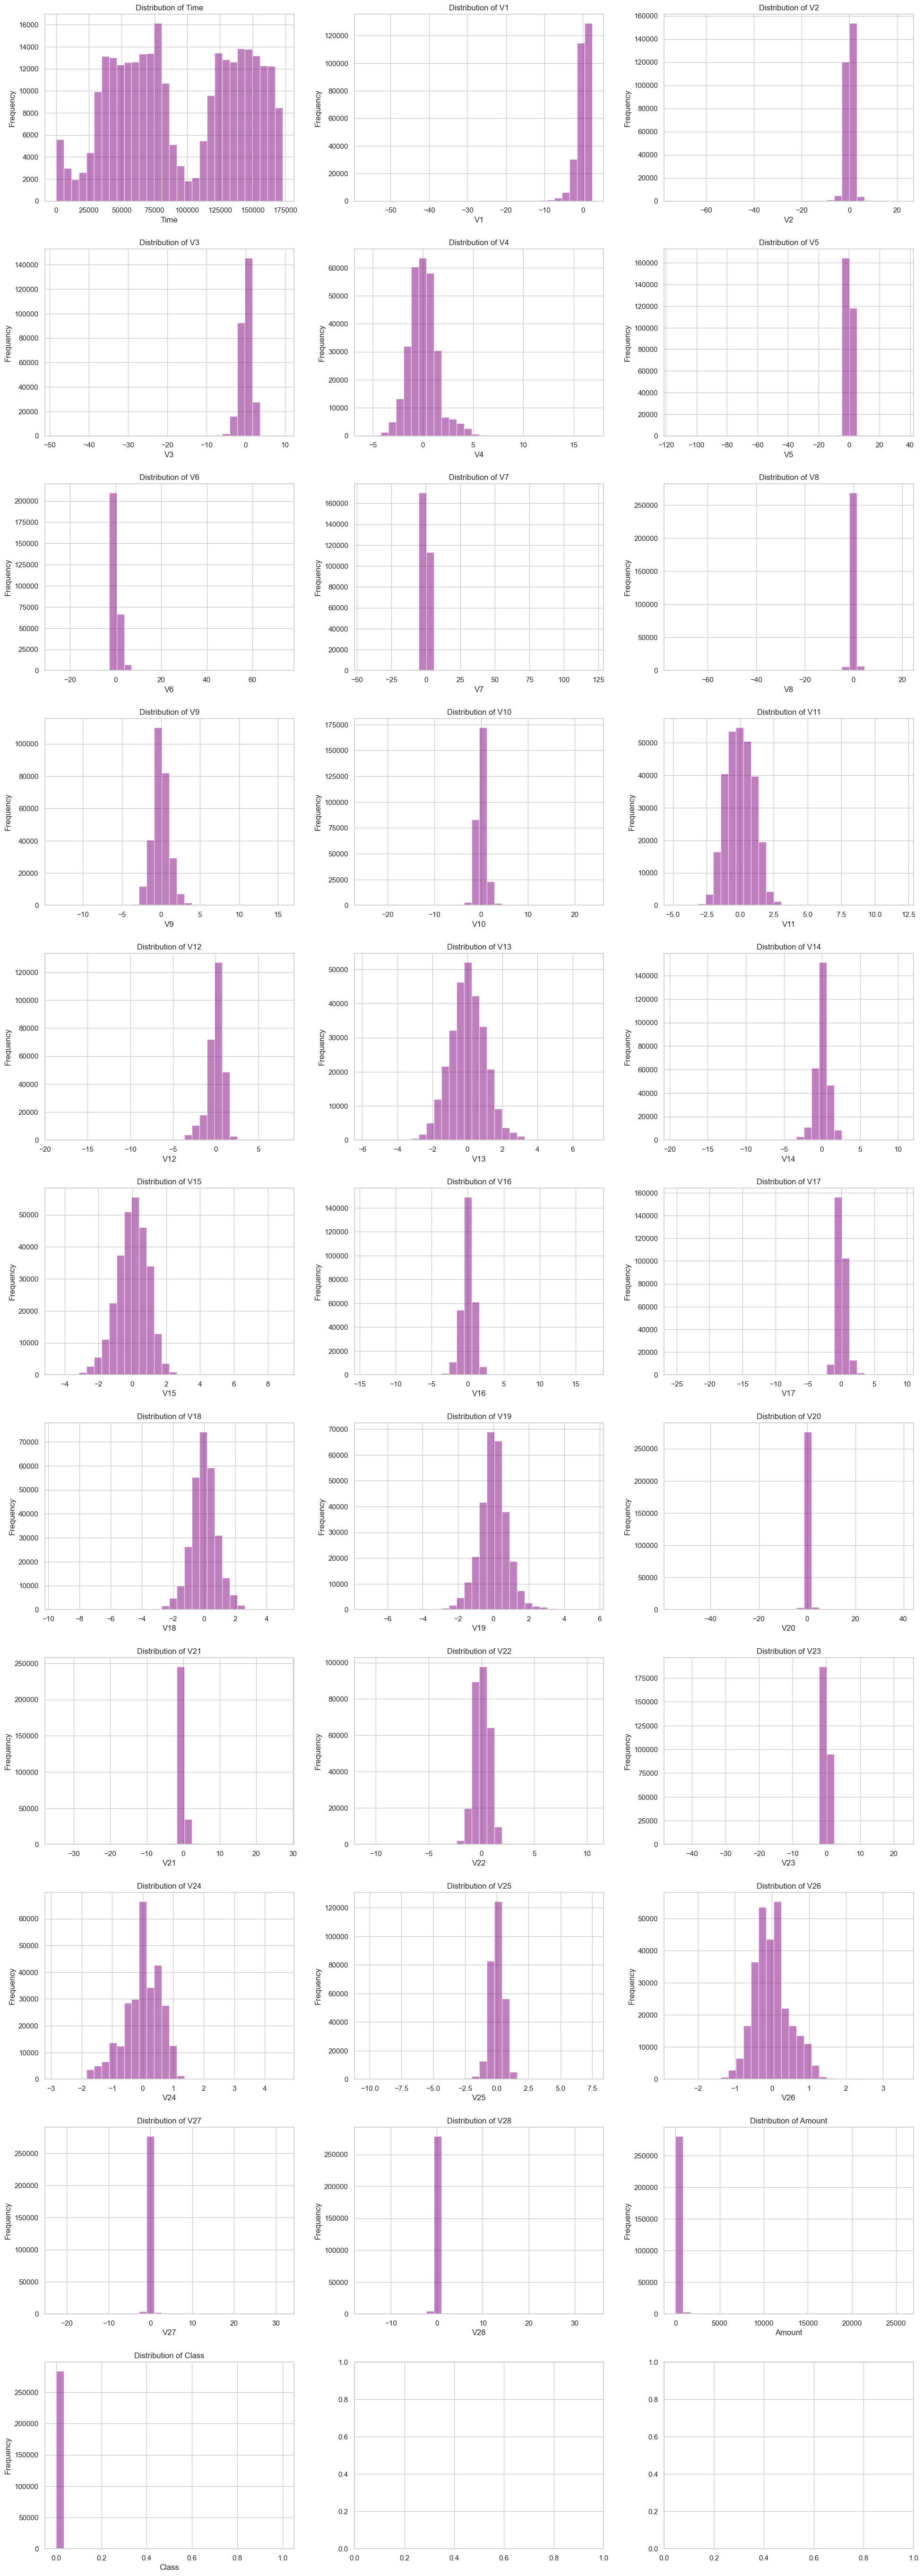

In [5]:
plot_distributions(cc_df, color='purple')

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def scatter_plot(data, x_col, y_col, y_color_col=None, dim_reduction=None, dim_reduction_kwargs=None):
    """
    This function takes a pandas DataFrame and two column names as input and generates a 2D scatter plot
    of the two columns. If a dimensionality reduction technique is specified, the function applies the
    technique to the data and plots the reduced data in a 2D scatter plot. If a y color column is specified,
    the function uses this column to set the color of the scatter points.
    """
    if dim_reduction is None:
        # if no dimensionality reduction technique is specified, use the raw data
        x = data[x_col]
        y = data[y_col]
    else:
        # if a dimensionality reduction technique is specified, apply the technique to the data
        if dim_reduction_kwargs is None:
            dim_reduction_kwargs = {}
        if dim_reduction == 'pca':
            reducer = PCA(**dim_reduction_kwargs)
        elif dim_reduction == 'tsne':
            reducer = TSNE(**dim_reduction_kwargs)
        else:
            raise ValueError(f'Invalid dimensionality reduction technique: {dim_reduction}')
        reduced_data = reducer.fit_transform(data)
        x = reduced_data[:, 0]
        y = reduced_data[:, 1]

    fig, ax = plt.subplots(figsize=(8, 8))
    if y_color_col is None:
        # if no y color column is specified, use the default color scheme
        ax.scatter(x, y)
    else:
        # if a y color column is specified, use the seaborn color palette to set the color of the scatter points
        palette = sns.color_palette('deep', n_colors=len(data[y_color_col].unique()))
        colors = {label: color for label, color in zip(data[y_color_col].unique(), palette)}
        ax.scatter(x, y, c=data[y_color_col].map(colors))
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(f'Scatter Plot of {x_col} vs {y_col} ({dim_reduction} Reduction)' if dim_reduction else f'Scatter Plot of {x_col} vs {y_col}')
    plt.show()


In [24]:
sample_df = pd.concat([cc_df[cc_df['Class'] == 1], cc_df[cc_df['Class'] == 0].sample(10000)]).reset_index().drop('index', 1)

C:\Users\user\AppData\Local\Temp\ipykernel_26260\2720487488.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sample_df = pd.concat([cc_df[cc_df['Class'] == 1], cc_df[cc_df['Class'] == 0].sample(10000)]).reset_index().drop('index', 1)


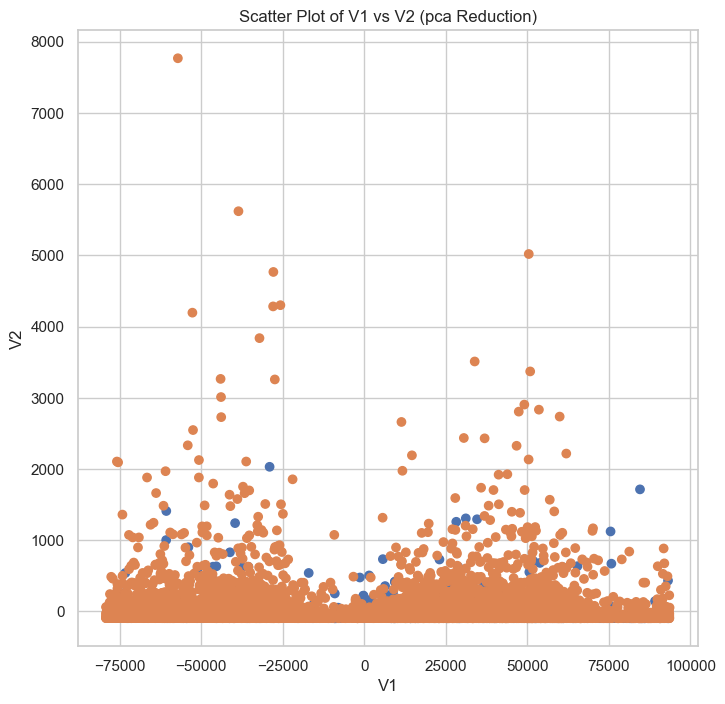

In [25]:
scatter_plot(sample_df,'V1', 'V2', dim_reduction='pca', y_color_col='Class')

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

def detect_fraud(data, target_col, test_size=0.2, random_state=42):
    """
    This function takes a pandas DataFrame and the name of the target column as input, and performs the following steps
    to build a fraud detection model:
    - Splits the data into training and testing sets
    - Applies standard scaling to the training and testing sets
    - Oversamples the minority class using SMOTE
    - Trains a logistic regression model on the training set
    - Predicts the target variable for the testing set
    - Computes and returns the confusion matrix and evaluation metrics for the predictions
    """
    # split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data.drop(target_col, axis=1), data[target_col], test_size=test_size, random_state=random_state)

    # apply standard scaling to the training and testing sets
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # oversample the minority class using SMOTE
    smote = SMOTE(random_state=random_state)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

    # train a logistic regression model on the training set
    lr = LogisticRegression(random_state=random_state)
    lr.fit(X_train_resampled, y_train_resampled)

    # predict the target variable for the testing set
    y_pred = lr.predict(X_test_scaled)

    # compute and return the confusion matrix and evaluation metrics for the predictions
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return {'confusion_matrix': {'tn': tn, 'fp': fp, 'fn': fn, 'tp': tp}, 'precision': precision, 'recall': recall, 'f1': f1}


In [27]:
cc_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
cc_df['Class'].plot(kind='bar')